<a href="https://colab.research.google.com/github/Rintan28/Exploratory-Data-Analysis/blob/main/Tugas_EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRAKTIKUM 1

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

# reset indeks dan tambahkan 1 untuk membuat indeks dimulai dari 1
df = df.reset_index(drop=True)
df.index = df.index + 1

# tampilkan beberap baris pertama dataframe untuk memastikan data berhasil dimuat
display(df.head())

Saving Salary_Data_Tugas EDA.xlsx to Salary_Data_Tugas EDA.xlsx


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,Bachelor's,Software Engineer,5.0,90000.0
2,28,Female,Master's,Data Analyst,3.0,65000.0
3,45,Male,PhD,Senior Manager,NaN,150000.0
4,36,Female,Bachelor's,Sales Associate,7.0,60000.0
5,52,Male,Master's,Director,20.0,200000.0


In [ ]:
# mengecek ukuran dataset (jumlah baris dan kolom)
print("Ukuran dataset (baris, kolom):", df.shape)

# mengecek  jumlah total elemen dalam dataset
print("Jumlah total elemen:", df.size)

Ukuran dataset (baris, kolom): (6707, 6)
Jumlah total elemen: 40242


In [ ]:
# mengecek tipe data dari sebuah variabel
my_variable = "Halowww"
print("Tipe data my_variable:", type(my_variable))

my_number = 123
print ("Tipe data my_number:", type(my_number))

# mengecek tipe data dari setiap kolom dalam dataframe
print("\nTipe data setiap kolom dalam DataFrame:")
print(df.dtypes)

Tipe data my_variable: <class 'str'>
Tipe data my_number: <class 'int'>

Tipe data setiap kolom dalam DataFrame:
Age                      int64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [ ]:
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom:")
print(missing_values)

Jumlah nilai yang hilang di setiap kolom:
Age                    0
Gender                 0
Education Level        1
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64


In [ ]:
# Hitung jumlah baris duplikat
duplicate_rows_count = df.duplicated().sum()

# cetak jumlah baris duplikat
print(f"Jumlah baris duplikat: {duplicate_rows_count}")

# jika ada baris duplikat, tampilkan semua baris duplikat
if duplicate_rows_count > 0:
  print ("\nSemua baris duplikat:")
  display(df[df.duplicated(keep=False)])

Jumlah baris duplikat: 4913

Semua baris duplikat:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,Bachelor's,Software Engineer,5.0,90000.0
2,28,Female,Master's,Data Analyst,3.0,65000.0
141,28,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
195,28,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
209,30,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
...,...,...,...,...,...,...
6700,30,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6701,46,Male,Master's Degree,Marketing Manager,14.0,140000.0
6702,26,Female,High School,Sales Executive,1.0,35000.0
6703,32,Male,Bachelor's,Software Engineer,5.0,90000.0


PRAKTIKUM 2

In [ ]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung statistik deskriptif dasar (count, mean, std, min, quartiles, max)
descriptive_stats = numerical_df.describe()
median_values = numerical_df.median()
mode_values = numerical_df.mode().iloc[0]
mad_values = numerical_df.apply(lambda x: (x - x.mean()).abs().mean())  # Mean Absolute Deviation
range_values = numerical_df.max() - numerical_df.min()
variance_values = numerical_df.var()

# Tambahkan statistik tambahan ke descriptive_stats
descriptive_stats.loc['median'] = median_values
descriptive_stats.loc['mode'] = mode_values
descriptive_stats.loc['mad'] = mad_values
descriptive_stats.loc['range'] = range_values
descriptive_stats.loc['variance'] = variance_values

# Tampilkan hasil
print("Ringkasan Statistik Deskriptif:")
display(descriptive_stats)

Ringkasan Statistik Deskriptif:


,Age,Years of Experience,Salary
count,6707.000000,6705.000000,6.703000e+03
mean,33.623677,8.096346,1.154461e+05
std,7.621529,6.067248,5.388179e+04
min,21.000000,0.000000,3.500000e+02
25%,28.000000,3.000000,7.000000e+04
50%,32.000000,7.000000,1.150000e+05
75%,38.000000,12.000000,1.600000e+05
max,62.000000,35.000000,1.000000e+06
median,32.000000,7.000000,1.150000e+05
mode,27.000000,2.000000,1.400000e+05


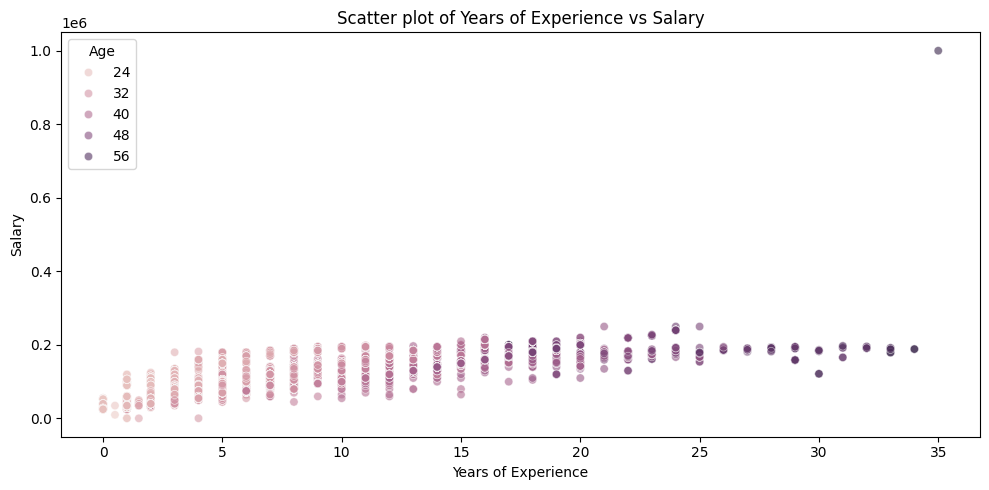

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh Visualisasi hubungan antar dua kolom numerik (Scatter Plot)
numerical_cols_scatter = ['Years of Experience', 'Salary']
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x=numerical_cols_scatter[0], y=numerical_cols_scatter[1], hue='Age', alpha=0.6)
plt.title(f'Scatter plot of {numerical_cols_scatter[0]} vs {numerical_cols_scatter[1]}')
plt.xlabel(numerical_cols_scatter[0])
plt.ylabel(numerical_cols_scatter[1])
plt.tight_layout()
plt.show()

PRAKTIKUM 3

In [ ]:
 # tampilkan lima baris pertama dari dataframe df
 print("Lima baris  pertama dari DataFrame: ")
 display (df.head())

 # cetak informasi ringkasn tentang DataFrame df
 print("\Informasi tentang DataFrame: ")
 df.info()

 # hitung dan tampilkan jumlah nilai yang hilang di setiap kolom
 print("\nJumlah nilai yang hilang di setiap kolom: ")
 print(df.isnull().sum())


Lima baris  pertama dari DataFrame: 


<>:6: SyntaxWarning: invalid escape sequence '\I'
<>:6: SyntaxWarning: invalid escape sequence '\I'
/tmp/ipython-input-2066494630.py:6: SyntaxWarning: invalid escape sequence '\I'
  print("\Informasi tentang DataFrame: ")


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,Bachelor's,Software Engineer,5.0,90000.0
2,28,Female,Master's,Data Analyst,3.0,65000.0
3,45,Male,PhD,Senior Manager,NaN,150000.0
4,36,Female,Bachelor's,Sales Associate,7.0,60000.0
5,52,Male,Master's,Director,20.0,200000.0


\Informasi tentang DataFrame: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6707 entries, 1 to 6707
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6707 non-null   int64  
 1   Gender               6707 non-null   object 
 2   Education Level      6706 non-null   object 
 3   Job Title            6706 non-null   object 
 4   Years of Experience  6705 non-null   float64
 5   Salary               6703 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 314.5+ KB

Jumlah nilai yang hilang di setiap kolom: 
Age                    0
Gender                 0
Education Level        1
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64


In [ ]:
status_mode = df['Salary'].mode()[0]
print(f"Modus dari kolom 'Salary': {status_mode}")

Modus dari kolom 'Salary': 140000.0


In [ ]:
# mengisi nilai yang hilang di kolom 'Age' dengan modus
df['Age'] = df['Age'].fillna(status_mode)

# verifikasi bahwa tidak ada lagi nilai yang hilang di kolom 'Age'
missing_values_after_fill = df['Age'].isnull().sum()
print(f"\nJumlah nilai yang hilang di kolom 'Age' setelah pengisian: {missing_values_after_fill}")


Jumlah nilai yang hilang di kolom 'Age' setelah pengisian: 0


In [ ]:
# hitung jumlah baris duplikat
duplicate_rows_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows_count}")

if duplicate_rows_count > 0:
    print("\nMenghapus baris duplikat...")
    # hapus baris duplikat
    df = df.drop_duplicates()
    print("Baris duplikat berhasil dihapus.")

duplicate_rows_count_after = df.duplicated().sum()
print(f"\nJumlah baris duplikat setelah penghapusan: {duplicate_rows_count_after}")

if duplicate_rows_count > 0:
    print("\nBeberapa baris pertama DataFrame setelah penghapusan duplikat")
    display(df.head())

Jumlah baris duplikat: 4913

Menghapus baris duplikat...
Baris duplikat berhasil dihapus.

Jumlah baris duplikat setelah penghapusan: 0

Beberapa baris pertama DataFrame setelah penghapusan duplikat


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,32,Male,Bachelor's,Software Engineer,5.0,90000.0
2,28,Female,Master's,Data Analyst,3.0,65000.0
3,45,Male,PhD,Senior Manager,NaN,150000.0
4,36,Female,Bachelor's,Sales Associate,7.0,60000.0
5,52,Male,Master's,Director,20.0,200000.0


In [ ]:
# identifikasi kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns

print("Memeriksa nilai unik dan distribusi untuk kolom kategorikal: ")
for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())

# identifikasi kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nMemeriksa statistik deskriptif untuk kolom numerik: ")
display(df[numerical_cols].describe())

Memeriksa nilai unik dan distribusi untuk kolom kategorikal: 

Kolom: Gender
Gender
Male      971
Female    816
Other       7
Name: count, dtype: int64

Kolom: Education Level
Education Level
Bachelor's Degree    508
Master's Degree      447
PhD                  342
Bachelor's           263
Master's             122
High School          110
phD                    1
Name: count, dtype: int64

Kolom: Job Title
Job Title
Software Engineer Manager    127
Full Stack Engineer          123
Senior Software Engineer      96
Senior Project Engineer       95
Back end Developer            81
                            ... 
Developer                      1
Social M                       1
Social Media Man               1
Delivery Driver                1
Intern                         1
Name: count, Length: 194, dtype: int64

Memeriksa statistik deskriptif untuk kolom numerik: 


,Age,Years of Experience,Salary
count,1794.000000,1792.000000,1790.000000
mean,35.140468,9.162109,113668.149162
std,8.232829,6.866281,55695.750262
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,70000.000000
50%,33.000000,8.000000,110000.000000
75%,41.000000,13.000000,160000.000000
max,62.000000,35.000000,1000000.000000


/tmp/ipython-input-2836937813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Title'] = df['Job Title'].str.lower().str.strip()



Distribusi kolom 'Job Title' setelah standarisasi: 
Job Title
software engineer manager    127
full stack engineer          123
senior software engineer      96
senior project engineer       95
back end developer            81
                            ... 
developer                      1
social m                       1
social media man               1
delivery driver                1
intern                         1
Name: count, Length: 193, dtype: int64


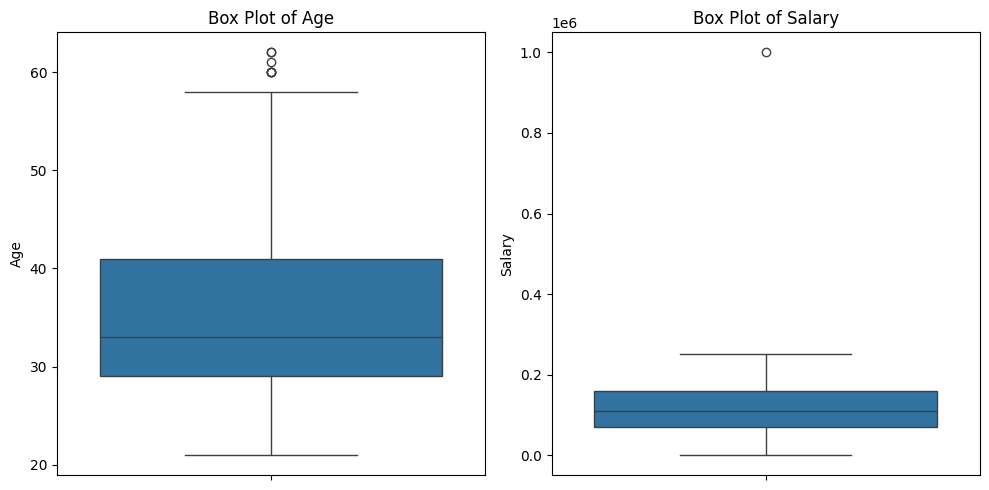

In [ ]:
# standarisasi kolom 'Job Title'
df['Job Title'] = df['Job Title'].str.lower().str.strip()

# verifikasi setelah standarisasi
print("\nDistribusi kolom 'Job Title' setelah standarisasi: ")
print(df['Job Title'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

# visualisasi kolom numerik untuk mendeteksi outlier (box plot)
numerical_cols_outliers = ['Age', 'Salary']
plt.figure(figsize=(10,5))
for i, col in enumerate(numerical_cols_outliers):
  plt.subplot(1,2,i+1)
  sns.boxplot(data=df, y=col)
  plt.title(f'Box Plot of {col}')
  plt.ylabel(col)
plt.tight_layout()
plt.show()


Statistik deskriptif untuk 'Salary' setelah capping (upper limit = 20000000):


/tmp/ipython-input-320747858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary'] = df['Salary'].clip(upper=upper_limit)


,Salary
count,1790.000000
mean,113668.149162
std,55695.750262
min,350.000000
25%,70000.000000
50%,110000.000000
75%,160000.000000
max,1000000.000000


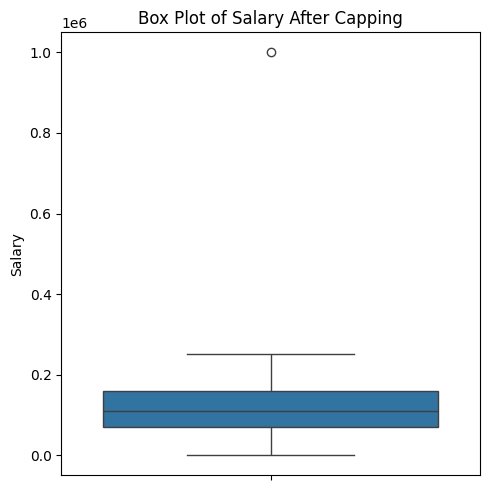

In [ ]:
upper_limit = 20000000

# Lakukan capping (batas atas)
df['Salary'] = df['Salary'].clip(upper=upper_limit)

# Tampilkan statistik deskriptif setelah capping
print(f"\nStatistik deskriptif untuk 'Salary' setelah capping (upper limit = {upper_limit}):")
display(df['Salary'].describe())

# Visualisasi 'Salary'' setelah capping dengan Box Plot
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, y='Salary')
plt.title('Box Plot of Salary After Capping')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

In [ ]:
df['Years of Experience'] = pd.to_datetime(df['Years of Experience'])
df['Tahun_Daftar'] = df['Years of Experience'].dt.year
df['bulan_Daftar'] = df['Years of Experience'].dt.month
df['Hari_Daftar'] = df['Years of Experience'].dt.day

display(df.head())

/tmp/ipython-input-3808227976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Years of Experience'] = pd.to_datetime(df['Years of Experience'])
/tmp/ipython-input-3808227976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tahun_Daftar'] = df['Years of Experience'].dt.year
/tmp/ipython-input-3808227976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Tahun_Daftar,bulan_Daftar,Hari_Daftar
1,32,Male,Bachelor's,software engineer,1970-01-01 00:00:00.000000005,90000.0,1970.0,1.0,1.0
2,28,Female,Master's,data analyst,1970-01-01 00:00:00.000000003,65000.0,1970.0,1.0,1.0
3,45,Male,PhD,senior manager,NaT,150000.0,NaN,NaN,NaN
4,36,Female,Bachelor's,sales associate,1970-01-01 00:00:00.000000007,60000.0,1970.0,1.0,1.0
5,52,Male,Master's,director,1970-01-01 00:00:00.000000020,200000.0,1970.0,1.0,1.0


In [ ]:
output_file_name = 'data_bersih.xlsx'
df.to_excel(output_file_name, index=False)
print(f"DataFrame berhasil disimpan dalam file Excel: {output_file_name}")

DataFrame berhasil disimpan dalam file Excel: data_bersih.xlsx


In [ ]:
# Hitung jumlah nilai yang hilang di kolom 'Age' sebelum penghapusan
missing_values_before_drop = df['Age'].isnull().sum()
print(f"Jumlah nilai yang hilang di kolom 'Age' sebelum penghapusan: {missing_values_before_drop}")

# Hapus baris dengan nilai yang hilang di kolom 'Age'
df_dropped = df.dropna(subset=['Age']).copy()

# Verifikasi bahwa tidak ada lagi nilai yang hilang di kolom 'Age'
missing_values_after_drop = df_dropped['Age'].isnull().sum()
print(f"\nJumlah nilai yang hilang di kolom 'Age' setelah penghapusan: {missing_values_after_drop}")

# Tampilkan beberapa baris pertama DataFrame setelah penghapusan
print("\nBeberapa baris pertama DataFrame setelah penghapusan nilai yang hilang:")
display(df_dropped.head())

# Tampilkan ukuran DataFrame setelah penghapusan
print(f"\nUkuran DataFrame setelah penghapusan nilai yang hilang: {df_dropped.shape}")

Jumlah nilai yang hilang di kolom 'Age' sebelum penghapusan: 0

Jumlah nilai yang hilang di kolom 'Age' setelah penghapusan: 0

Beberapa baris pertama DataFrame setelah penghapusan nilai yang hilang:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Tahun_Daftar,bulan_Daftar,Hari_Daftar
1,32,Male,Bachelor's,software engineer,1970-01-01 00:00:00.000000005,90000.0,1970.0,1.0,1.0
2,28,Female,Master's,data analyst,1970-01-01 00:00:00.000000003,65000.0,1970.0,1.0,1.0
3,45,Male,PhD,senior manager,NaT,150000.0,NaN,NaN,NaN
4,36,Female,Bachelor's,sales associate,1970-01-01 00:00:00.000000007,60000.0,1970.0,1.0,1.0
5,52,Male,Master's,director,1970-01-01 00:00:00.000000020,200000.0,1970.0,1.0,1.0



Ukuran DataFrame setelah penghapusan nilai yang hilang: (1794, 9)


In [ ]:
# Tentukan batas atas untuk outlier (sesuai dengan yang Anda gunakan sebelumnya)
upper_limit = 2000000

# Hitung jumlah baris sebelum penghapusan outlier
rows_before_drop = len(df)
print(f"Jumlah baris sebelum menghapus outlier: {rows_before_drop}")

# Hapus baris di mana 'Salary' lebih besar dari batas atas
df_no_outliers = df[df['Salary'] <= upper_limit].copy()

# Hitung jumlah baris setelah penghapusan outlier
rows_after_drop = len(df_no_outliers)
print(f"Jumlah baris setelah menghapus outlier di 'Salary': {rows_after_drop}")
print(f"Jumlah outlier yang dihapus: {rows_before_drop - rows_after_drop}")

# Tampilkan statistik deskriptif untuk 'Salary' setelah penghapusan outlier
print("\nStatistik deskriptif untuk 'Salary' setelah menghapus outlier:")
display(df_no_outliers['Salary'].describe())

# Tampilkan beberapa baris pertama DataFrame setelah penghapusan outlier
print("\nBeberapa baris pertama DataFrame setelah menghapus outlier:")
display(df_no_outliers.head())


Jumlah baris sebelum menghapus outlier: 1794
Jumlah baris setelah menghapus outlier di 'Salary': 1790
Jumlah outlier yang dihapus: 4

Statistik deskriptif untuk 'Salary' setelah menghapus outlier:


,Salary
count,1790.000000
mean,113668.149162
std,55695.750262
min,350.000000
25%,70000.000000
50%,110000.000000
75%,160000.000000
max,1000000.000000



Beberapa baris pertama DataFrame setelah menghapus outlier:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Tahun_Daftar,bulan_Daftar,Hari_Daftar
1,32,Male,Bachelor's,software engineer,1970-01-01 00:00:00.000000005,90000.0,1970.0,1.0,1.0
2,28,Female,Master's,data analyst,1970-01-01 00:00:00.000000003,65000.0,1970.0,1.0,1.0
3,45,Male,PhD,senior manager,NaT,150000.0,NaN,NaN,NaN
4,36,Female,Bachelor's,sales associate,1970-01-01 00:00:00.000000007,60000.0,1970.0,1.0,1.0
5,52,Male,Master's,director,1970-01-01 00:00:00.000000020,200000.0,1970.0,1.0,1.0


PRAKTIKUM 4

In [ ]:
correlation = df['Years of Experience'].corr(df['Salary'])
print(f'Korelasi antara Years of Experience dan Salary: {correlation}')

# hitung koefiesien determinasi (R-squared)

r_squared = correlation**2
print(f'Koefisien Determinasi (R-squared) antara Years of Experience dan Salary: {r_squared}')

Korelasi antara Years of Experience dan Salary: -0.015427005659603265
Koefisien Determinasi (R-squared) antara Years of Experience dan Salary: 0.00023799250362143117


PRAKTIKUM 5

In [1]:
import statsmodels.formula.api as smf
import pandas as pd

file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

# Reset indeks dan tambahkan 1 untuk membuat indeks dimulai dari 1
df = df.reset_index(drop=True)
df.index = df.index + 1

# Definisikan dan sesuaikan model regresi
model_salary_years = smf.ols('Tahun Daftar ~ Salary', data=df).fit()

# Mengambil koefisien dari model regresi Pendapatan vs Usia
intercept_salary_years = model_salary_years.params['Intercept']
usia_coef_salary_years = model_salary_years.params['Salary']

# Mengambil Jumlah Kuadrat Residual (SSR) dari model baru
ssr_salary_years = model_salary_years.ssr

print(f"Jumlah Kuadrat Residual (SSR) untuk model Tahun Daftar vs Salary: {ssr_salary_years:.4f}")
print("Persamaan Garis Regresi (Tahun Daftar vs Salary):")
print(f"Salary_prediksi = ({intercept_salary_years:.4f}) + ({usia_coef_salary_years:.4f}) * Salary")

NameError: name 'uploaded' is not defined

Hasil Uji Shapiro-Wilk: statistik = nan, p-value = nan
Data tidak berdistribusi normal (menolak H₀)


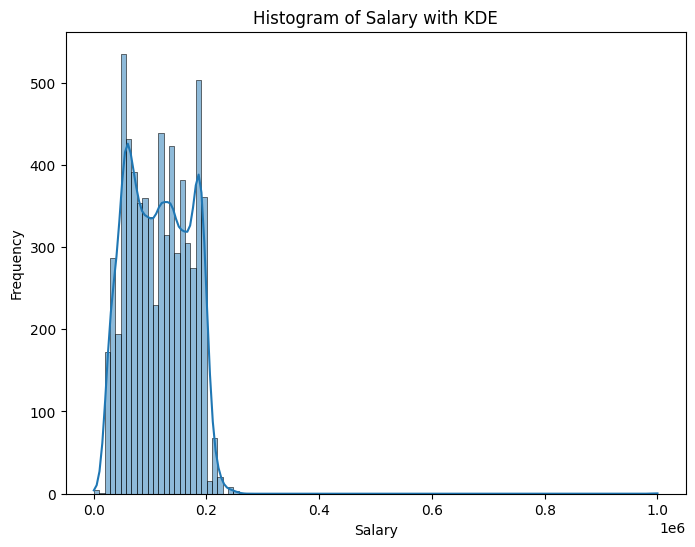

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

shapiro_test = stats.shapiro(df['Salary'])
print(f"Hasil Uji Shapiro-Wilk: statistik = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}")

alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("Data kemungkinan berdistribusi normal (gagal menolak H₀)")
else:
    print("Data tidak berdistribusi normal (menolak H₀)")

plt.figure(figsize=(8, 6))
sns.histplot(df['Salary'], kde=True)
plt.title('Histogram of Salary with KDE')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

Kesimpulan dari tugas satu ini adalah bahwa proses praktikum 1-5 dapat mengidentifikasi dan memperbaiki berbagai masalah data seperti nilai yang hilang, duplikat dan outlier pada  kolom "Salary". Pembersihan data juga menunjukkan bahwa rata-rata usia responden sekitar 35 tahun dengan gaji rata-ratasekitar 113 ribu dolar. Hasil korelasi antara "Years of Experience" menunjukkan hubungan yang sangat lemah.